# Aim: To understand how to use FB_Prophet
* We won't be able to critically analyse the reason for price fall or rise during certain time of year. 
                Reason Being
                1. We don't know from where these Avocardos are coming
                2. Thus don't know about its harvesting time.
                3. Though we have voume of avocardo in transaction. Lets see how we can get that in our favour
* **And remember Prophet works best with SEASONAL DATA**
* This is why I think predicting price of Avocado will be best fit as supply of Avocado is dependent on season of harvesting.

In [1]:
# Installing Prophet

! pip install prophet

     |████████████████████████████████| 65 kB 1.8 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
     |████████████████████████████████| 178 kB 9.4 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6643858 sha256=d0b9393ca9013d235ef2ad97163631b1fdeba220b4340e969d495d2ed2e616da
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random

# Importing Prophet
from fbprophet import Prophet

# importing module
import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('../input/avocado-prices/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## EDA

<AxesSubplot:>

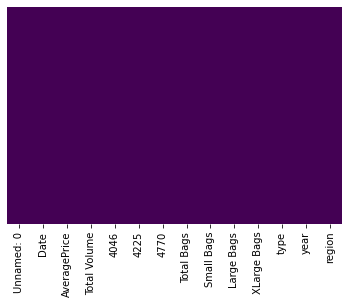

In [6]:
sns.heatmap(df.isnull(), yticklabels= False,cbar= False , cmap='viridis' )
# there is no null value

In [7]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

In [8]:
# we saw there are 2 type of Avocardo Lets check their percentage

Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

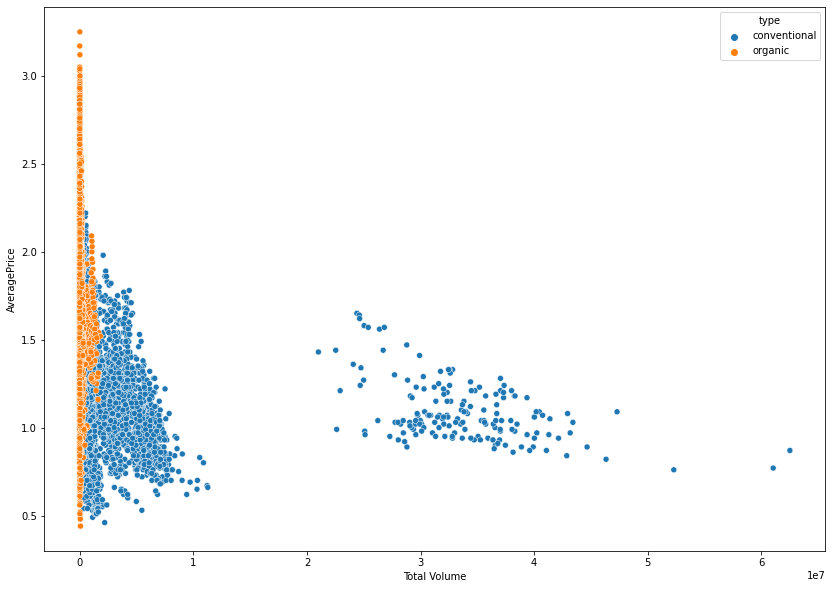

In [9]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df)

In [10]:
con=df[df['type']=='conventional'].groupby('year')['Total Volume'].agg('mean')
org=df[df['type']=='organic'].groupby('year')['Total Volume'].agg('mean')

trace1=go.Bar(x=con.index,y=con,name="Conventional",
             marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

trace2=go.Bar(x=con.index,y=org,name="Organic",
             marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

data=[trace1,trace2]

layout=go.Layout(barmode="stack",title="Organic vs. Conventional (Mean Volume)",
                yaxis=dict(title="Volume"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

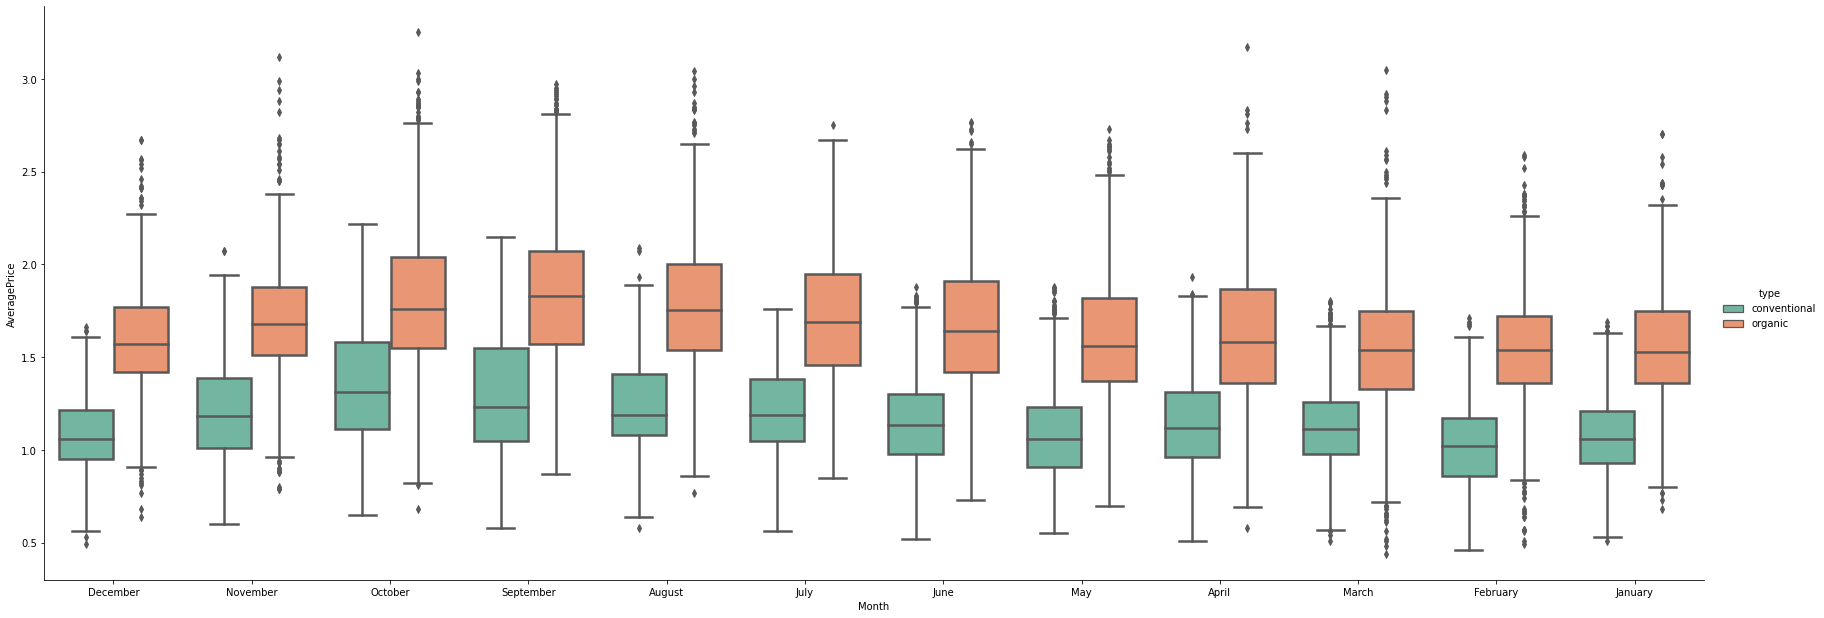

In [11]:
import seaborn as sns
# Split Date into 3 different columns

df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str

# compare month wise price of avocado 
# organic and conventional 

df['Month'] = df['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})


ax = sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2");

* We can see only 2.81% of all Avocado sold is organic
* Thus we can conclude the price of Organic Avocado won't affect the price over all 
* So it might be better if we drop it

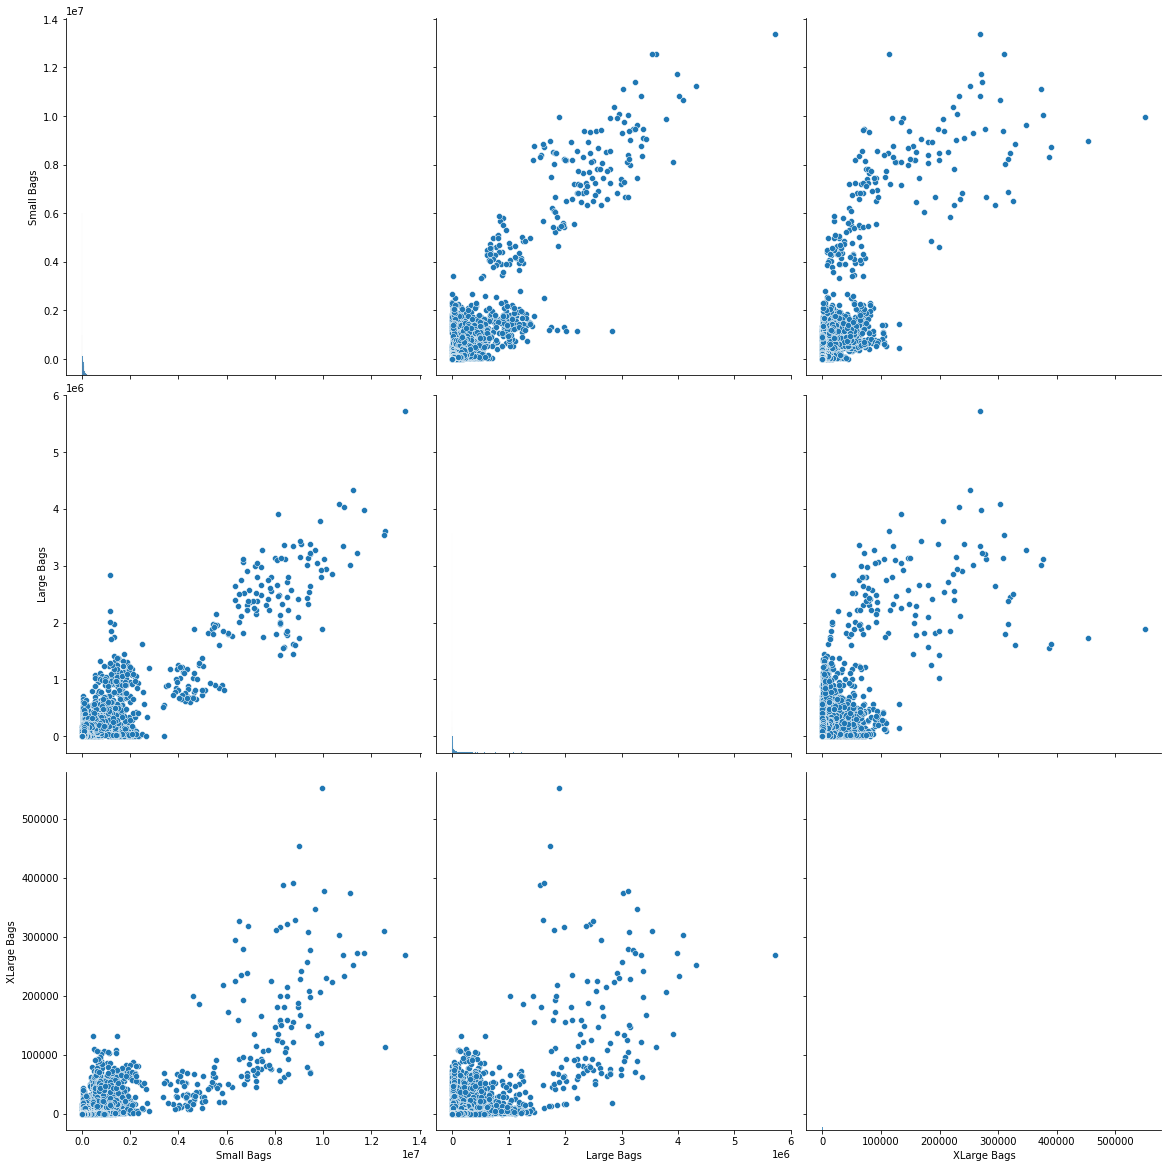

In [12]:
sns.pairplot(df.iloc[:,8:11], palette="husl",height=5.5)

In [13]:
df.region.unique().sum()

'AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuffaloRochesterCaliforniaCharlotteChicagoCincinnatiDaytonColumbusDallasFtWorthDenverDetroitGrandRapidsGreatLakesHarrisburgScrantonHartfordSpringfieldHoustonIndianapolisJacksonvilleLasVegasLosAngelesLouisvilleMiamiFtLauderdaleMidsouthNashvilleNewOrleansMobileNewYorkNortheastNorthernNewEnglandOrlandoPhiladelphiaPhoenixTucsonPittsburghPlainsPortlandRaleighGreensboroRichmondNorfolkRoanokeSacramentoSanDiegoSanFranciscoSeattleSouthCarolinaSouthCentralSoutheastSpokaneStLouisSyracuseTampaTotalUSWestWestTexNewMexico'

In [14]:
# Sort by date
df = df.sort_values('Date')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,2015,January,04
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,2015,January,04
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,2015,January,04
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,2015,January,04
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise,2015,January,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,2018,March,25
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,2018,March,25
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,2018,March,25
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California,2018,March,25


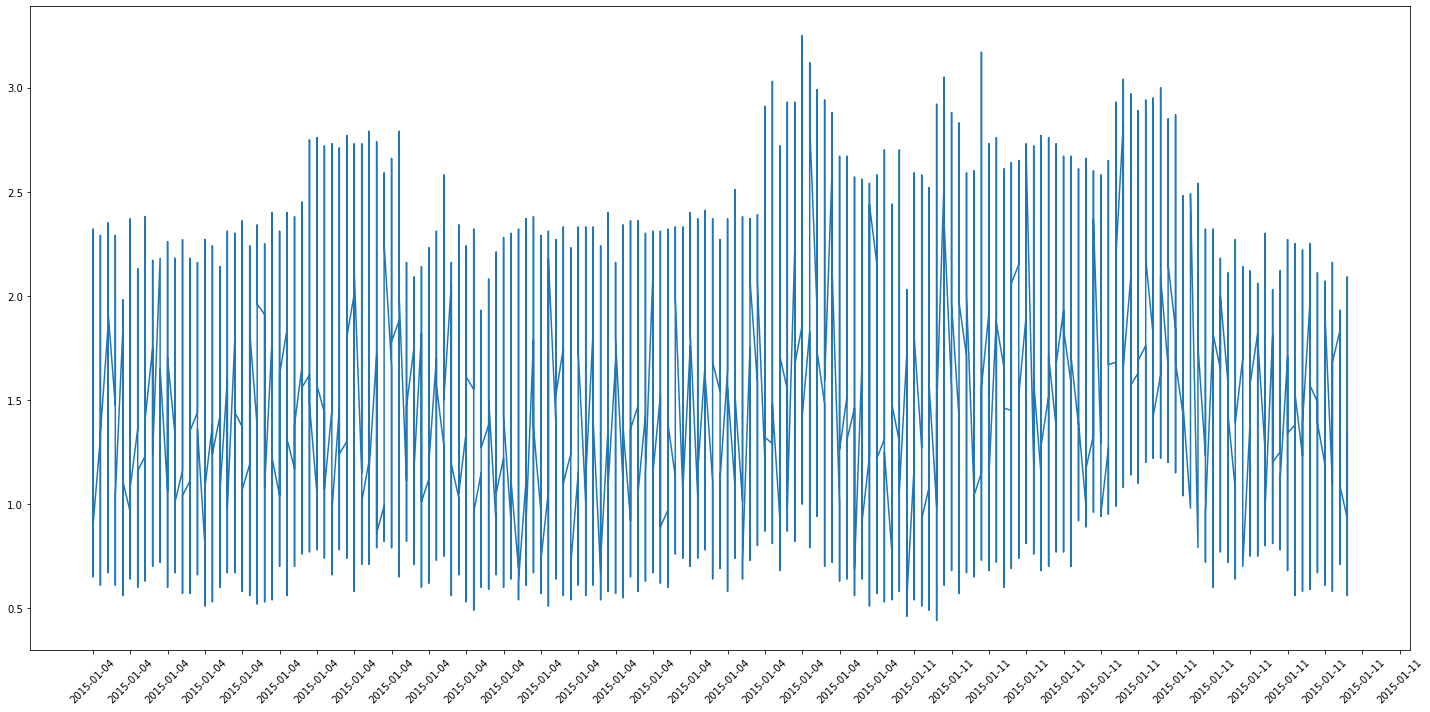

In [15]:
# Date vs average price

plt.figure(figsize=(20,10))
plt.xticks(np.arange(df.shape[0])[::5], df.Date[::5], rotation = 45)
plt.plot(df['Date'], df['AveragePrice'])
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
plt.savefig('timeseries.png')
# uncomment to get grid plt.grid()


## Setting Axis-Level Tick Frequency in Matplotlib
You can use the set_xticks() and set_yticks() functions on the returned Axes instance when adding subplots to a Figure. Let's create a Figure with two axes and change the tick frequency on them separately:

In [16]:
''' #converting dataframe to array
date = pd.Series(df['Date'])
x=type(date.to_numpy())

# Age price
av= pd.Series(df['AveragePrice'])
y=type(date.to_numpy())

print(y)'''

" #converting dataframe to array\ndate = pd.Series(df['Date'])\nx=type(date.to_numpy())\n\n# Age price\nav= pd.Series(df['AveragePrice'])\ny=type(date.to_numpy())\n\nprint(y)"

In [17]:
'''#converting dataframe to array
date = pd.Series(df['Date'])
x=type(date.to_numpy())

# Age price
av= pd.Series(df['AveragePrice'])
y=type(date.to_numpy())
                 

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
plt.xticks(np.arange(0, len(x)+1, 5))
plt.plot(x, y)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
# uncomment to get grid plt.grid()'''


"#converting dataframe to array\ndate = pd.Series(df['Date'])\nx=type(date.to_numpy())\n\n# Age price\nav= pd.Series(df['AveragePrice'])\ny=type(date.to_numpy())\n                 \n\nplt.figure(figsize=(20,10))\nplt.xticks(rotation = 90)\nplt.xticks(np.arange(0, len(x)+1, 5))\nplt.plot(x, y)\nplt.tick_params(axis='x', which='major', labelsize=10)\nplt.tight_layout()\n# uncomment to get grid plt.grid()"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

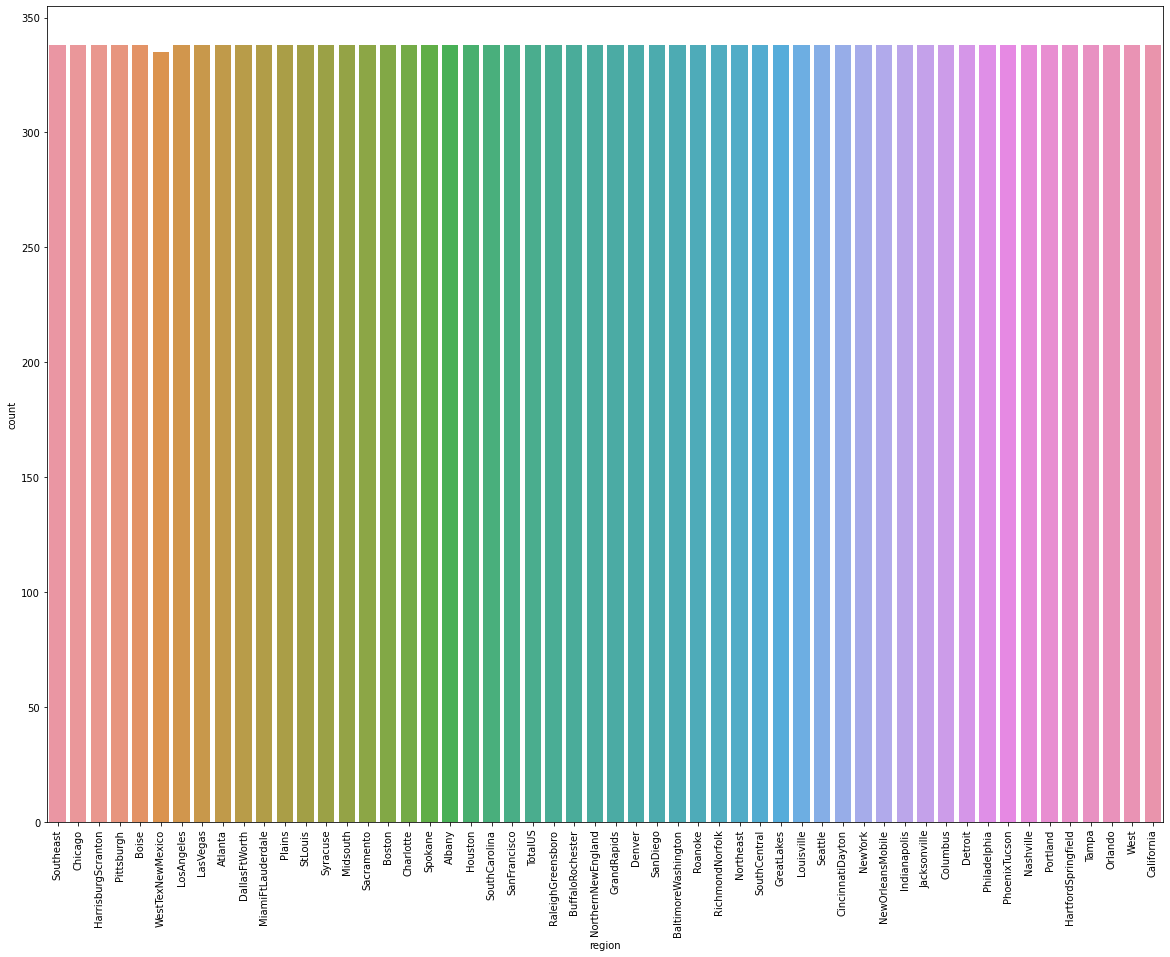

In [18]:
# correlation version region and price
plt.figure(figsize=[20,15])
plot= sns.countplot(x= 'region', data= df)
plt.xticks(rotation = 90)
# plt.setp(plot.get_xticklabels(),rotation=90)
# Was returning lots of None, so decided to go with
# Didn't work plt.xticks(rotation = 90, np.array(0,4,step=5))


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

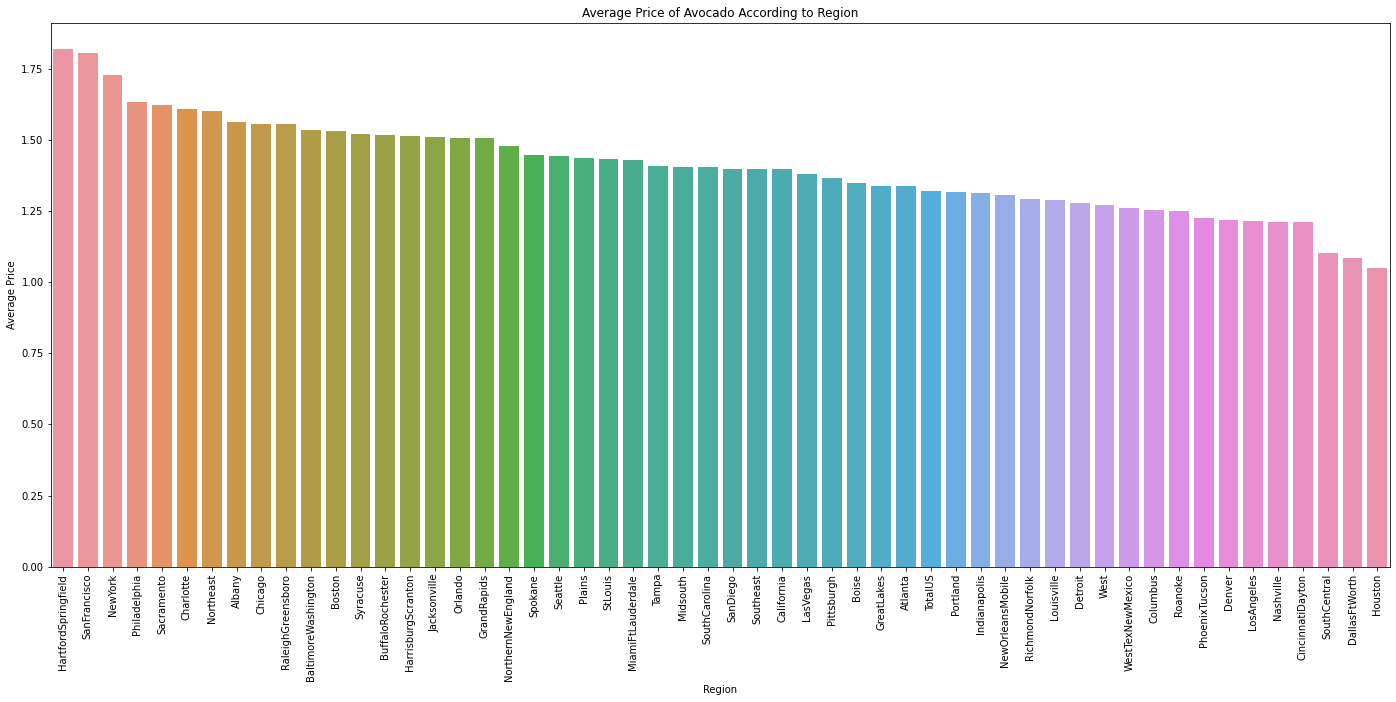

In [19]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

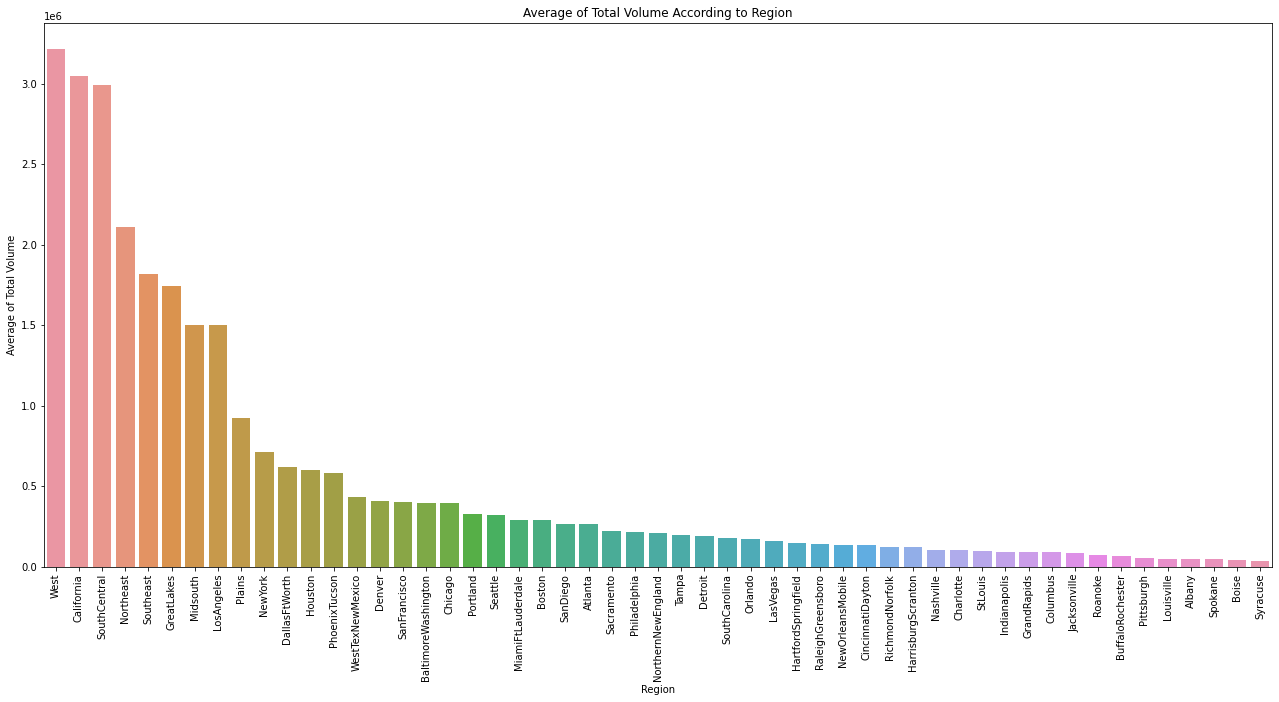

In [20]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

<AxesSubplot:xlabel='year', ylabel='count'>

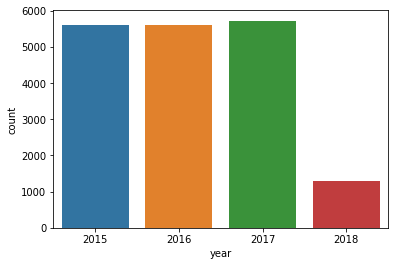

In [21]:
sns.countplot(x= 'year', data= df)

In [22]:
# Since Prophet require only 2 columns namely
# Data and Avg Price
# Lets create new df for prophet only

prophet_df= df[['Date', 'AveragePrice']]
prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [23]:
# Prophet expect Date in its variable as DS and target variable as Y to operate. This how it was designed.
# Thus have to rename our column names in prophet_df
prophet_df= prophet_df.rename(columns={'Date' :'ds' , 'AveragePrice':'y'})
prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [24]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      18249 non-null  object 
 1   y       18249 non-null  float64
dtypes: float64(1), object(1)
memory usage: 943.8+ KB


In [25]:
prophet_df.describe()

,y
count,18249.000000
mean,1.405978
std,0.402677
min,0.440000
25%,1.100000
50%,1.370000
75%,1.660000
max,3.250000


## Make Predictions

In [26]:
# Intantiate (represent as or by an instance.) the Prophet object to lets say m 
# P IN PROPHET IS ALWAYS CAPS
m = Prophet()

In [27]:
m.fit(prophet_df)

In [28]:
# Forecast the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.928295,1.859891,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.881678,1.855412,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.897467,1.860126,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.844175,1.817815,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.860000,1.808001,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.571975,1.601132,0.984201,1.346028,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.560713,1.597819,0.982576,1.345185,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.605725,1.658377,0.980950,1.345077,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.587079,1.601251,0.979325,1.345017,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


Prophet showed us the trends what are we expecting what are the **Trends**.
* Last row dates to **25th March 2019** Though original data had prices till 25th March 2018 only
* yhat_upper = upper limit.
* yhat_lower = lower limit.

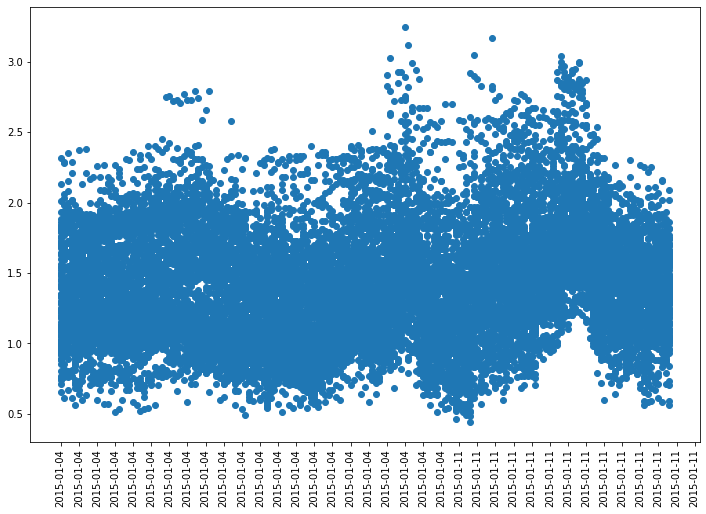

In [30]:
plt.figure(figsize=(12,8)) # 8 is hight

plt.xticks(np.arange(prophet_df.shape[0])[::5], prophet_df.ds[::5], rotation=90)
plt.scatter(prophet_df['ds'],prophet_df['y'] )

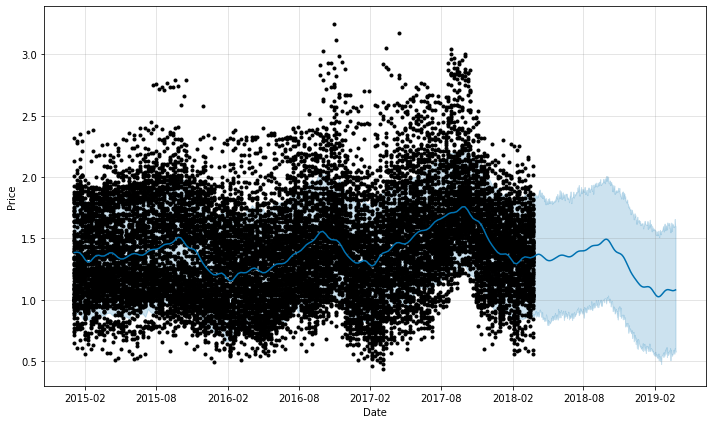

In [31]:
figure = m.plot( forecast, xlabel= 'Date', ylabel= 'Price')

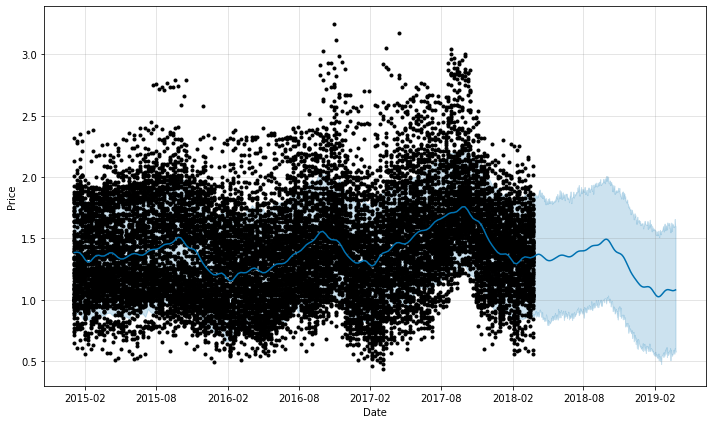

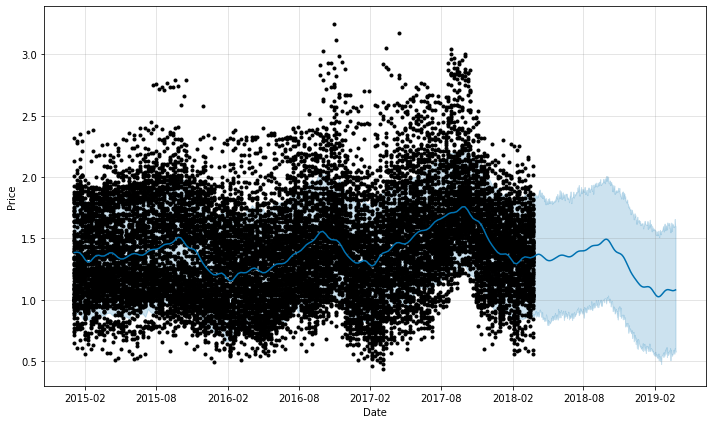

In [32]:
m.plot( forecast, xlabel= 'Date', ylabel= 'Price')

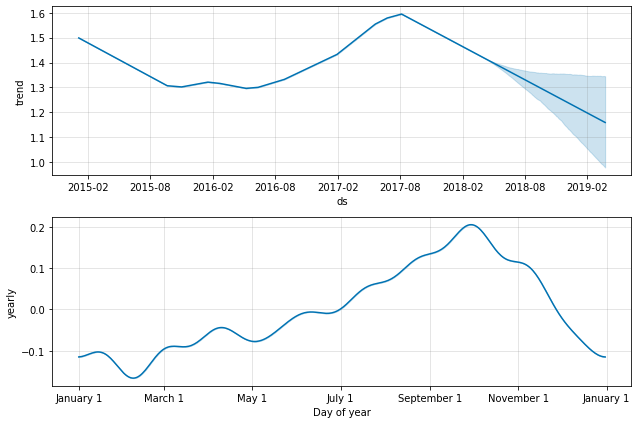

In [33]:
figure = m.plot_components(forecast)

* Why cost of Avocardo increase in month of Oct?
* Why cost of avocardo decreases in january?
* **Are related with harvesting period?**

'ax.set_xticks(np.arange(0, len(x)+1, 5))\nax.set_yticks(np.arange(0, max(y), 2))\nax2.set_xticks(np.arange(0, len(x)+1, 25))\nax2.set_yticks(np.arange(0, max(y), 25))'

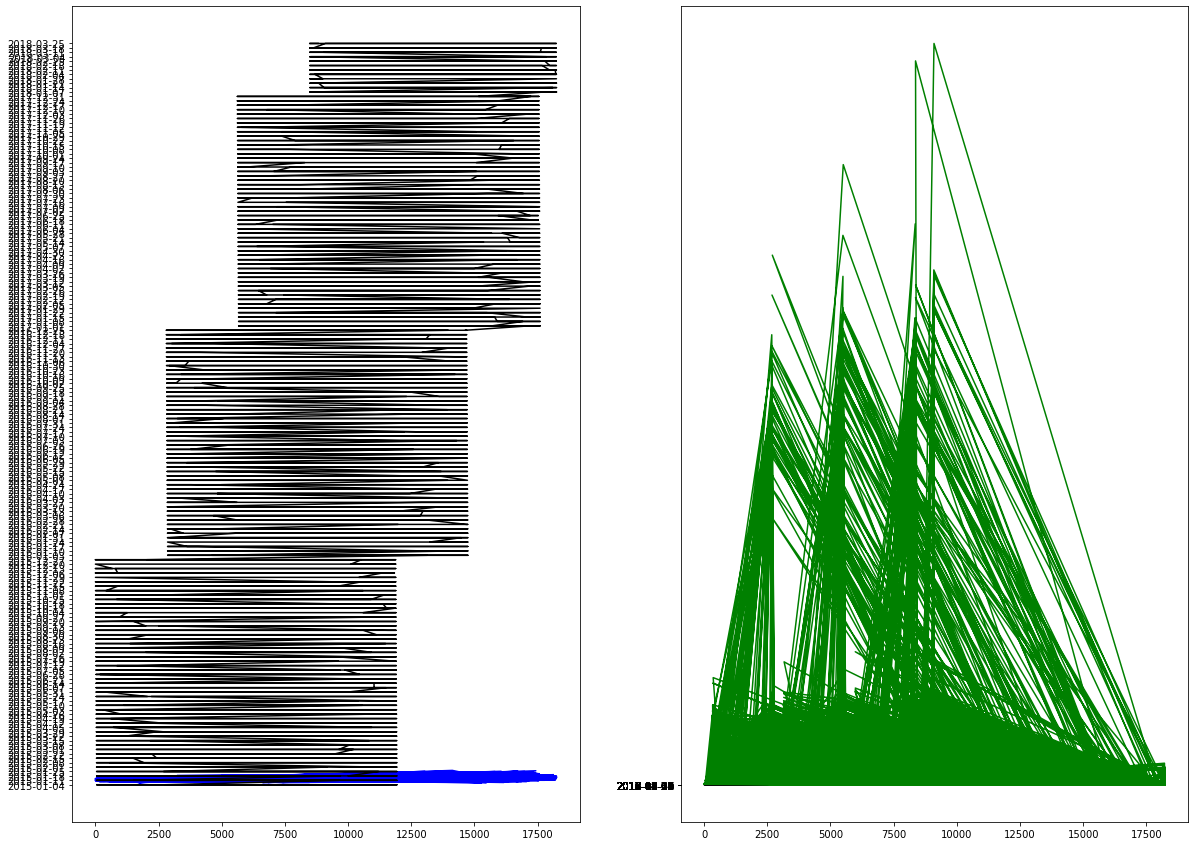

In [34]:
# Lets check if Price of Avocardo is raised due to rise in demand.

fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = df['AveragePrice']
y = df['Date']
z = df['Total Volume']

ax.plot(x, color='blue')
ax.plot(y, color='black')
ax2.plot(y, color='black')
ax2.plot(z, color='green')

'''ax.set_xticks(np.arange(0, len(x)+1, 5))
ax.set_yticks(np.arange(0, max(y), 2))
ax2.set_xticks(np.arange(0, len(x)+1, 25))
ax2.set_yticks(np.arange(0, max(y), 25))'''


### Checking for Chicago

In [35]:
# Sub set
df_chicago= df[df['region']== 'Chicago']
df_chicago

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,2015,January,04
467,51,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,2015,January,04
9592,50,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago,2015,January,11
466,50,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago,2015,January,11
465,49,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago,2015,January,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,2,2018-03-11,1.54,830421.03,95041.64,454041.33,142564.10,138773.96,100438.58,37184.96,1150.42,conventional,2018,Chicago,2018,March,11
17698,1,2018-03-18,1.66,35542.17,184.53,26955.74,0.00,8401.90,8398.57,3.33,0.00,organic,2018,Chicago,2018,March,18
8575,1,2018-03-18,1.42,841171.24,85185.29,435552.05,174149.72,146284.18,110035.76,34764.91,1483.51,conventional,2018,Chicago,2018,March,18
17697,0,2018-03-25,1.69,35088.36,324.87,27550.29,0.00,7213.20,7176.54,36.66,0.00,organic,2018,Chicago,2018,March,25


In [36]:
# Sort by date
df_chicago= df_chicago.sort_values('Date')
df_chicago

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,2015,January,04
467,51,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,2015,January,04
9592,50,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago,2015,January,11
466,50,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago,2015,January,11
465,49,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago,2015,January,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,2,2018-03-11,1.54,830421.03,95041.64,454041.33,142564.10,138773.96,100438.58,37184.96,1150.42,conventional,2018,Chicago,2018,March,11
17698,1,2018-03-18,1.66,35542.17,184.53,26955.74,0.00,8401.90,8398.57,3.33,0.00,organic,2018,Chicago,2018,March,18
8575,1,2018-03-18,1.42,841171.24,85185.29,435552.05,174149.72,146284.18,110035.76,34764.91,1483.51,conventional,2018,Chicago,2018,March,18
17697,0,2018-03-25,1.69,35088.36,324.87,27550.29,0.00,7213.20,7176.54,36.66,0.00,organic,2018,Chicago,2018,March,25


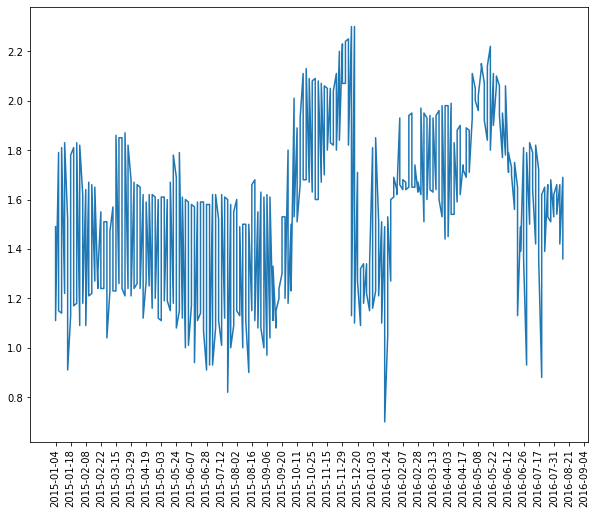

In [37]:
#
plt.figure(figsize=(10,8))
plt.xticks(np.arange(df_chicago.shape[0])[::5], df_chicago.Date[::5], rotation=90)
plt.plot(df_chicago['Date'], df_chicago['AveragePrice'])

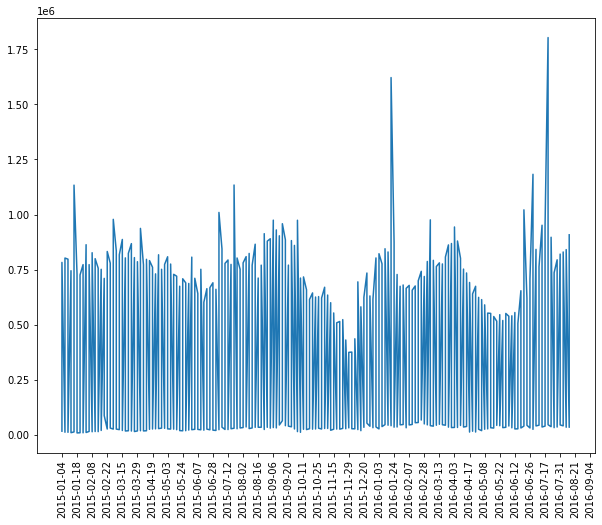

In [38]:
plt.figure(figsize=(10,8))

# plt.xticks(np.arange(df_chicago.shape[0])[::X], df_chicago.Date[::X], rotation=90)
# X represents interval
plt.xticks(np.arange(df_chicago.shape[0])[::5], df_chicago.Date[::5], rotation=90)

plt.plot(df_chicago['Date'], df_chicago['Total Volume'])

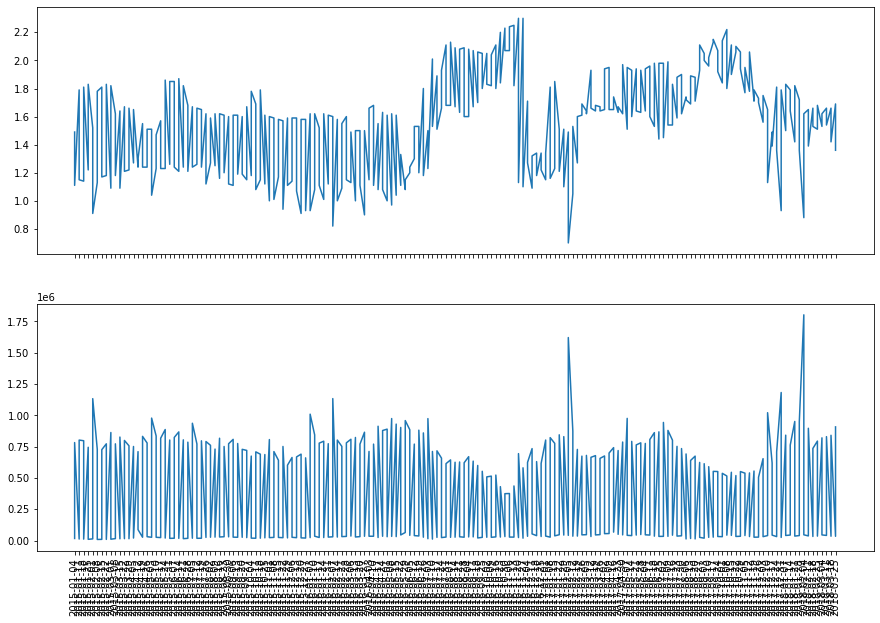

In [39]:
# fig = plt.figure(figsize=(25, 20))
# Total Volume = Total no of avocado sold

x= df_chicago['Date']
y= df_chicago['AveragePrice']
z= df_chicago['Total Volume']
afig, (ax1, ax2) = plt.subplots(2, figsize=(15,10), sharex=True)
plt.xticks(np.arange(df_chicago.shape[0])[::10], df_chicago.Date[::10], rotation=90)
fig.suptitle('price and volume')
ax1.plot(x, y)
ax2.plot(x, z)


**Here we can observe price of Avocado is inversely proportional to volume of sold avocard.**
* lets compare price of organic avocardo with 

In [40]:
df_chicago.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,2015,January,04


In [41]:
df_con = df_chicago[df_chicago['type']== 'conventional']
df_con

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
467,51,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,2015,January,04
466,50,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago,2015,January,11
465,49,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago,2015,January,18
464,48,2015-01-25,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago,2015,January,25
463,47,2015-02-01,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago,2015,February,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,4,2018-02-25,1.51,794925.31,74465.63,452448.67,131640.53,136370.48,91023.86,44466.75,879.87,conventional,2018,Chicago,2018,February,25
8577,3,2018-03-04,1.53,820728.47,109595.38,465039.55,104755.22,141338.32,97377.72,42517.93,1442.67,conventional,2018,Chicago,2018,March,04
8576,2,2018-03-11,1.54,830421.03,95041.64,454041.33,142564.10,138773.96,100438.58,37184.96,1150.42,conventional,2018,Chicago,2018,March,11
8575,1,2018-03-18,1.42,841171.24,85185.29,435552.05,174149.72,146284.18,110035.76,34764.91,1483.51,conventional,2018,Chicago,2018,March,18


In [42]:
# Organic
df_or = df_chicago[df_chicago['type']== 'organic']
df_or

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago,2015,January,04
9592,50,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago,2015,January,11
9591,49,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago,2015,January,18
9590,48,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago,2015,January,25
9589,47,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago,2015,February,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17701,4,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago,2018,February,25
17700,3,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago,2018,March,04
17699,2,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago,2018,March,11
17698,1,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago,2018,March,18


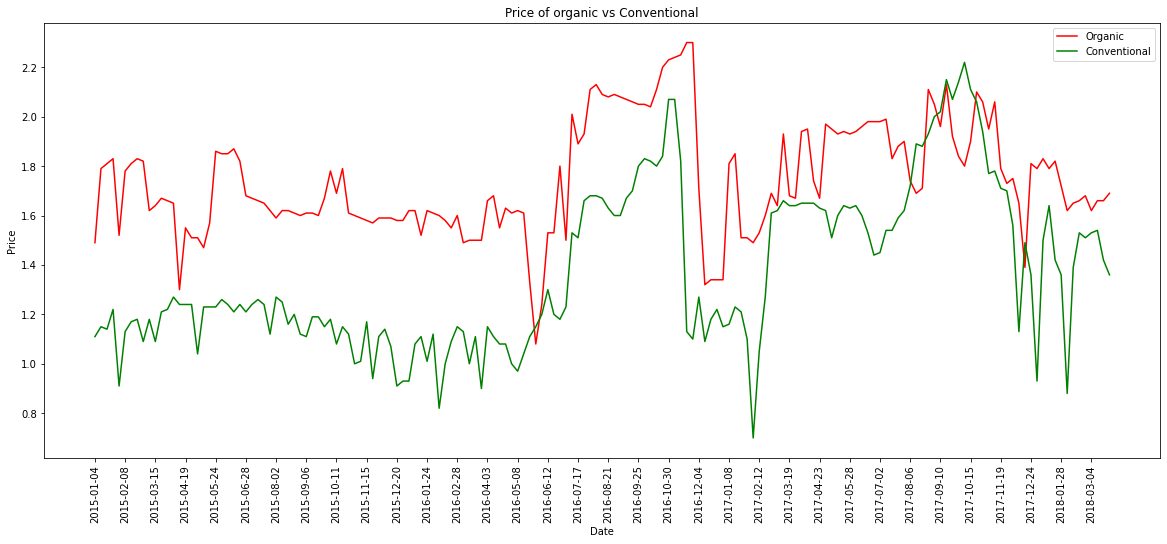

In [43]:
# Plotting both prices simultaneously of organic and con

X =df_or['Date']
y= df_or['AveragePrice']
z= df_con['AveragePrice']

plt.figure(figsize=(20,8))
plt.xticks(np.arange(df_or.shape[0])[::5], df_or.Date[::5], rotation=90)
plt.plot(X, y, color='r', label='Organic')
plt.plot(X, z, color='g', label='Conventional')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price of organic vs Conventional")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# Placing figsize over here didn't worked but placing it above .plot worked as charme

# To load the display window
plt.show()

# Pro tip ALWAYS PLACE FIGSIZE BEFORE plt.plot.


* Here we can clearly see the cost of Organic Avocado is higher than Conventional avocado.

## Prediction for Chicago 

In [44]:
df_con= df_con.rename(columns ={'Date':'ds', 'AveragePrice':'y'})
df_con = df_con[['ds', 'y']]
df_con

,ds,y
467,2015-01-04,1.11
466,2015-01-11,1.15
465,2015-01-18,1.14
464,2015-01-25,1.22
463,2015-02-01,0.91
...,...,...
8578,2018-02-25,1.51
8577,2018-03-04,1.53
8576,2018-03-11,1.54
8575,2018-03-18,1.42


In [45]:
m1=Prophet()

In [46]:
m1.fit(df_con)

In [47]:
future = m.make_future_dataframe(periods=365)
forecast= m1.predict(future)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.250180,0.788683,1.195012,1.250180,1.250180,-0.257363,-0.257363,-0.257363,-0.257363,-0.257363,-0.257363,0.0,0.0,0.0,0.992817
1,2015-01-11,1.246848,0.903104,1.298457,1.246848,1.246848,-0.153813,-0.153813,-0.153813,-0.153813,-0.153813,-0.153813,0.0,0.0,0.0,1.093035
2,2015-01-18,1.243516,0.912388,1.314224,1.243516,1.243516,-0.134743,-0.134743,-0.134743,-0.134743,-0.134743,-0.134743,0.0,0.0,0.0,1.108774
3,2015-01-25,1.240184,0.821602,1.212365,1.240184,1.240184,-0.236620,-0.236620,-0.236620,-0.236620,-0.236620,-0.236620,0.0,0.0,0.0,1.003564
4,2015-02-01,1.236853,0.687265,1.071148,1.236853,1.236853,-0.367752,-0.367752,-0.367752,-0.367752,-0.367752,-0.367752,0.0,0.0,0.0,0.869100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.906419,1.573909,1.997388,1.841713,1.968542,-0.132657,-0.132657,-0.132657,-0.132657,-0.132657,-0.132657,0.0,0.0,0.0,1.773762
530,2019-03-22,1.906923,1.548130,1.996289,1.841891,1.969267,-0.128803,-0.128803,-0.128803,-0.128803,-0.128803,-0.128803,0.0,0.0,0.0,1.778121
531,2019-03-23,1.907427,1.580279,1.997430,1.842095,1.969992,-0.123277,-0.123277,-0.123277,-0.123277,-0.123277,-0.123277,0.0,0.0,0.0,1.784150
532,2019-03-24,1.907931,1.582260,2.009830,1.842564,1.970717,-0.116210,-0.116210,-0.116210,-0.116210,-0.116210,-0.116210,0.0,0.0,0.0,1.791721


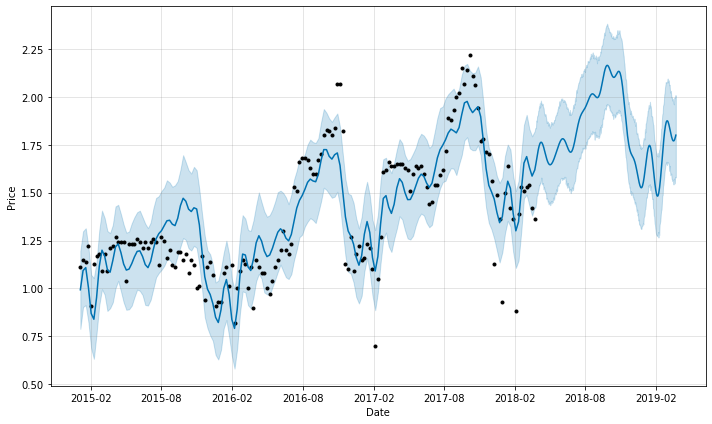

In [49]:
figure = m1.plot(forecast, xlabel ='Date', ylabel = 'Price')

We can see there are definatly some Outlier
* n statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.
* **When we predicted the price of avocado on avg it showed it was going down but in case of Chicago it is going down but fall is low compared to previous prediction.**